<a href="https://colab.research.google.com/github/AnaClaraRivas/Aulas_PA/blob/main/AnaliseDados/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AnaClaraRivas/analise-de-dados/refs/heads/main/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Colunas e significados do dataset:

* **Acidez Fixa**: Mostra a acidez que não muda no vinho.

* **Acidez Volátil**: É o ácido que dá um gosto azedo.

* **Ácido Cítrico**: Adiciona frescor ao vinho.

* **Açúcar Residual**: Mostra quão doce é o vinho; afeta o sabor (seco ou doce).

* **Cloretos**: Relacionados ao sal; muito sal pode mudar o sabor.

* **Dióxido de Enxofre Livre**: Conservante que evita que o vinho estrague.

* **Dióxido de Enxofre Total**: Ajuda a entender como o vinho é guardado.

* **Densidade**: Mostra o que tem no vinho; pode indicar açúcar e álcool.

* **pH**: Mede quão ácido o vinho é.

* **Sulfatos**: Ajudam a dar uma sensação de frescor.

* **Álcool**: Mede quanto álcool tem; afeta o corpo e o sabor do vinho.

* **Qualidade**: Nota geral do vinho, ajuda a ver se as pessoas gostam.

# 1. Definição do Problema:
Qual a questão a ser resolvida? O que esperamos descobrir com a análise?

1.   *Como as características químicas (como acidez fixa, acidez volátil e pH) se correlacionam entre si?*

2.   *Como é o teor alcolico entre as qualidades?*

3. *Quais são as características associadas aos vinhos de menor qualidade?*

A análise tem o objetivo de identificar e entender as características químicas dos vinhos tintos e como essas características se relacionam com a qualidade do vinho.



# 2 - Coleta de Dados:
**Fonte de Dados:** A base de dados utilizada é do Kaggle, chamada Bike Sharing Dataset. O dataset contém informações sobre o número de bicicletas alugadas em diferentes horários e condições meteorológicas.

***Já foi feita nos ítens anteriores!***

# 3 - Exploração de Dados:
Neste passo, inspecionamos a estrutura dos dados, verificamos a presença de valores faltantes e geramos estatísticas descritivas.

In [ ]:
# Verificando valores faltantes
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Exibindo informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 4 - Visualização de Dados:
Vamos agora criar gráficos para responder às perguntas formuladas na fase de Definição do Problema.

**Pergunta 1:** *Como as características químicas (como acidez fixa, acidez volátil e pH) se correlacionam entre si?*

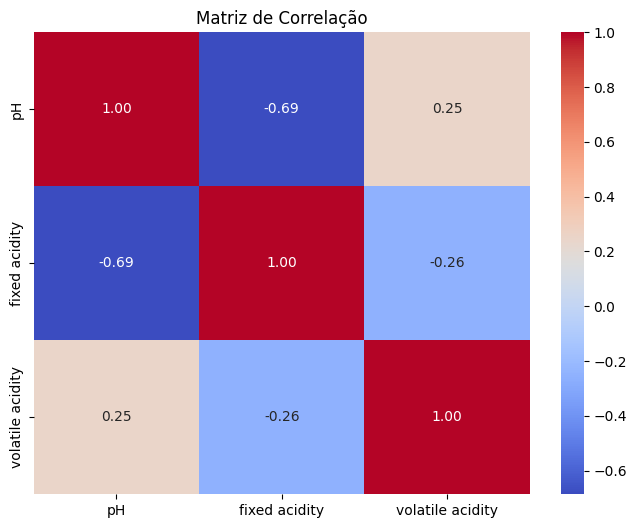

In [ ]:

correlação = df[['pH', 'fixed acidity' , 'volatile acidity']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlação, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


**Pergunta 2:** *Como é o teor alcolico entre as qualidades?*

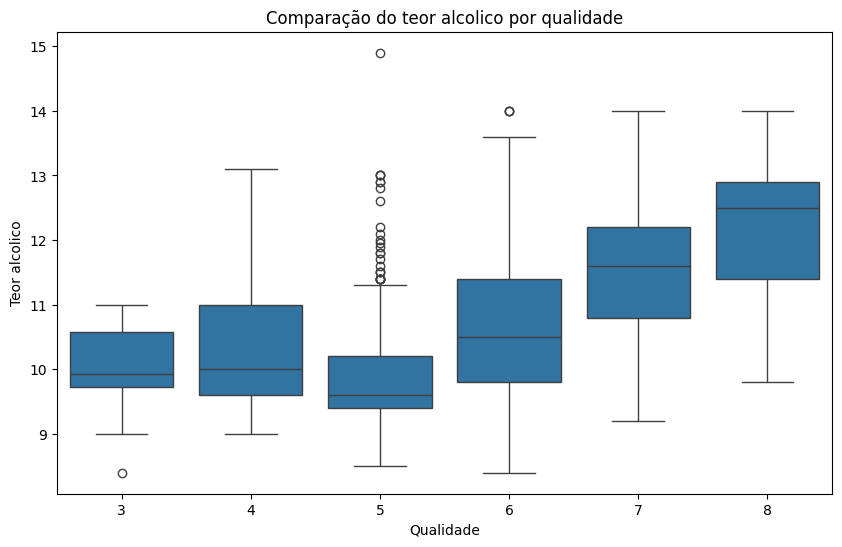

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quality', y='alcohol')
plt.title('Comparação do teor alcolico por qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Teor alcolico')
plt.show()

**Pergunta 3:** *Quais são as características associadas aos vinhos de menor qualidade?*

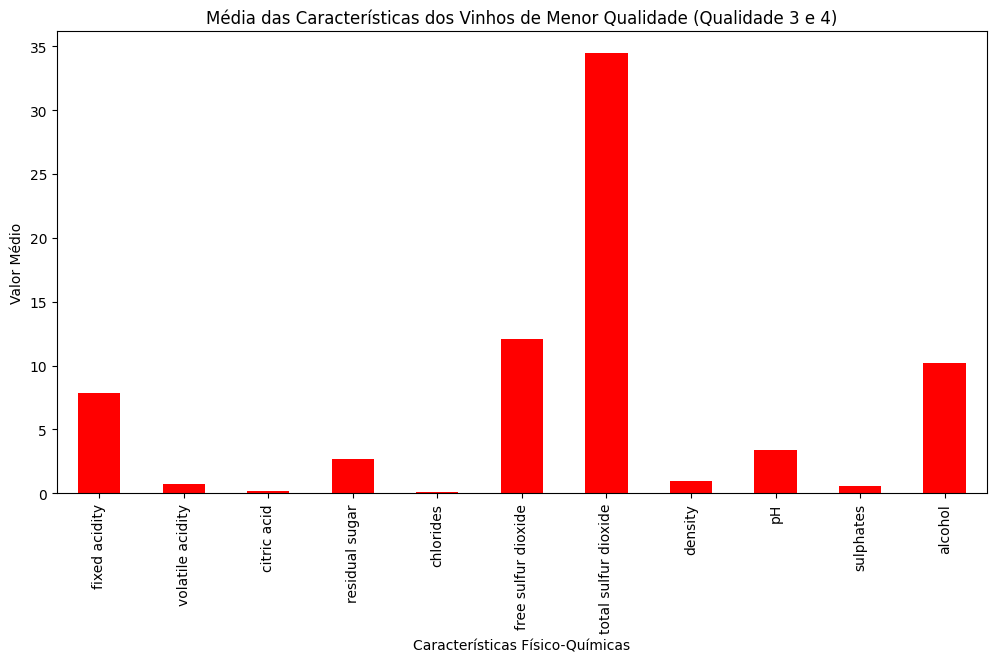

In [ ]:
# Filtrar os vinhos de menor qualidade (qualidade 3 ou 4)
menores_qualidades = df[df['quality'] <= 4]

# Calcular a média das características
media = menores_qualidades.mean()

# Selecionar as características para o gráfico
características = media.index[:-1] # Excluindo a coluna 'quality'
media_características = media[:-1]  # Excluindo a média da qualidade

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
media_características.plot(kind='bar', color='red')
plt.title('Média das Características dos Vinhos de Menor Qualidade (Qualidade 3 e 4)')
plt.xlabel('Características Físico-Químicas')
plt.ylabel('Valor Médio')
plt.show()

# 5 - Conclusão e Comunicação:
**Conclusão 1:**
Podemos concluir que entre estes três elementos a maior correlção é entre o pH e a acidez volátil, contando com a correlação de 0.25, o que ainda é muito baixo comparando com a escala apresentada. Isso por conta que não há uma relação direta entre pH e acidez volátil. Um vinho com pH baixo pode ter alta acidez volátil, e vice-versa.

**Conclusão 2:** O teor alcolico não é tão discrepante entre as qualidades, podemos observar que a qualidade 8 possui um maior teor alcolico do que as outras. A qualidade 5 é a que apresenta maior variedade de valores, tendo muitas amostras que fogem de sua média.

**Conclusão 3:** Os vinhos com as menores qualidades mostram ter mais dióxido de enxofre total e a uma pequena quantia de ácido cítrico, isso por conta das diferentes variedades de uva que podem possuir concentrações naturais de ácido cítrico distintas. Assim como os cloretos, onde a composição do solo e a água utilizada na irrigação podem influenciar significativamente a quantidade deles nas uvas.


